# EDA Notebook - Refined Variable Version
## Notes - Feb 10th 10:25 PM PST

This notebook builds on V2.1 and jsut restricts the variable list to be ones which were found to have had low completions rates in v2.1

**You can ask ChatGPT to create Python Arrays of variables if you just pass it a list of variabls that have been printed out.**

This notebook uses a **cleaned version** of the SPSS file. The follwing changes were made:
1. The file was exported from SPSS with only 180 or so variables which we are using
2. The SYSTEM MISSING cells (which are usually represented by a . (dot)) in SPSS were replaced with -999

This allows us to export it to CSV without losing data.

Previously it was converting .'s to 0.0 which was casuing all kinds of problems.

# File Descriptions

These files

 - **pisa-2022-182var-recoded-02102025.csv_local.csv**
    - This is Mick's new main data file with the MATH_Proficient variable and 180 other variables
 - **PISA 2022 - CSV - DD - Sheet1.csv**
    - This is a data dictionary of the fields

In [1]:
import boto3
import pandas as pd
import os
import numpy as np

# Define local file path
local_file_path = "pisa-2022-182var-recoded-02102025.csv_local.csv"  # Change as needed

# Define S3 details
bucket_name = "sagemaker-us-west-2-986030204467"
file_key = "capstone/testfiles/pisa-2022-182var-recoded-02102025.csv"

# AWS credentials are usually stored in ~/.aws/credentials or IAM roles (if running on AWS services)
s3_client = boto3.client("s3")

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

columns_to_read_full = ['MATH_Proficient', 'CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'SISCO', 'ST347Q01JA', 'ST347Q02JA', 
 'DURECEC', 'EFFORT1', 'EFFORT2', 'ST259Q01JA', 'HOMEPOS', 'ST004D01T', 'GRADE', 'REPEAT', 
 'EXPECEDU', 'IMMIG', 'LANGN', 'TARDYSD', 'ST226Q01JA', 'ST016Q01NA', 'MISSSC', 'Option_UH', 'OECD', 
 'PAREDINT', 'BMMJ1', 'BFMJ2', 'ST230Q01JA', 'SKIPPING', 'ST059Q02JA', 'ST296Q04JA', 'STUDYHMW', 
 'ST059Q01TA', 'ST296Q01JA', 'ST272Q01JA', 'ST268Q01JA', 'ST268Q04JA', 'ST268Q07JA', 'ST297Q01JA', 
 'ST297Q03JA', 'ST297Q05JA', 'ST297Q06JA', 'ST297Q07JA', 'ST297Q09JA', 'ST258Q01JA', 'ST294Q01JA', 
 'ST295Q01JA', 'EXERPRAC', 'RELATST', 'BELONG', 'BULLIED', 'FEELSAFE', 'SCHRISK', 'CURIOAGR', 
 'GROSAGR', 'FAMSUP', 'DISCLIM', 'TEACHSUP', 'COGACRCO', 'COGACMCO', 'EXPOFA', 'EXPO21ST', 'MATHEFF', 
 'MATHEF21', 'ANXMAT', 'MATHPERS', 'CREATEFF', 'CREATSCH', 'CREATFAM', 'CREATOP', 'OPENART', 'ESCS', 
 'WORKPAY', 'WORKHOME']

columns_to_read = columns_to_read_full

# Check if the file exists locally
if os.path.exists(local_file_path):
    print("📂 Loading data from local file...")
    df = pd.read_csv(local_file_path, usecols=columns_to_read)
else:
    print("☁️ Downloading data from S3...")
    
    # Create S3 client
    s3_client = boto3.client("s3")

    # Download the file from S3
    response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

    # Read the file into pandas DataFrame
    df = pd.read_csv(response["Body"], usecols=columns_to_read)

    # Save a local copy for future use
    df.to_csv(local_file_path, index=False)
    print(f"✅ File saved locally as {local_file_path}")

# Display first few rows
df.head()

📂 Loading data from local file...


,MATH_Proficient,CNT,CNTRYID,CNTSCHID,CNTSTUID,SISCO,ST347Q01JA,ST347Q02JA,DURECEC,EFFORT1,...,ANXMAT,MATHPERS,CREATEFF,CREATSCH,CREATFAM,CREATOP,OPENART,ESCS,WORKPAY,WORKHOME
0,0,ALB,8,800282,800001,9,99,99,99,10,...,0.5440,-0.0085,2.4021,0.0590,0.8155,99.0000,0.7507,1.1112,0,10
1,0,ALB,8,800115,800002,9,99,99,99,9,...,99.0000,99.0000,99.0000,99.0000,99.0000,99.0000,99.0000,-3.0507,99,99
2,0,ALB,8,800242,800003,9,99,99,4,10,...,99.0000,99.0000,99.0000,99.0000,99.0000,99.0000,99.0000,-0.1867,0,0
3,0,ALB,8,800245,800005,1,6,1,0,99,...,0.5653,-0.2546,-0.4909,-0.3010,-1.0261,-0.5423,-0.0564,-3.2198,0,10
4,1,ALB,8,800285,800006,1,4,6,1,10,...,-0.2704,-0.1735,-0.7475,-0.1405,-0.9293,0.9322,0.9037,-1.0548,0,4


# Load Data Dictionary

In [5]:
# Load the metadata file
file_key = "capstone/testfiles/PISA 2022 - CSV - DD - Sheet1.csv"  # e.g., "datasets/mydata.csv"

# Read the file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

df_metadata = pd.read_csv(response["Body"], usecols=[0, 4], names=["Field_ID", "Field_Description"], header=0)

# Display first few rows to verify
print(df_metadata.head())

# Convert to dictionary for quick lookup
field_description_lookup = df_metadata.set_index("Field_ID")["Field_Description"].to_dict()

   Field_ID                                  Field_Description
0       CNT                           Country code 3-character
1   CNTRYID                                 Country Identifier
2  CNTSCHID                                    Intl. School ID
3  CNTSTUID                                   Intl. Student ID
4       CYC  PISA Assessment Cycle (2 digits + 2 character ...


# Check Invalid Value Rate Before Cleaning

<Figure size 1500x600 with 0 Axes>

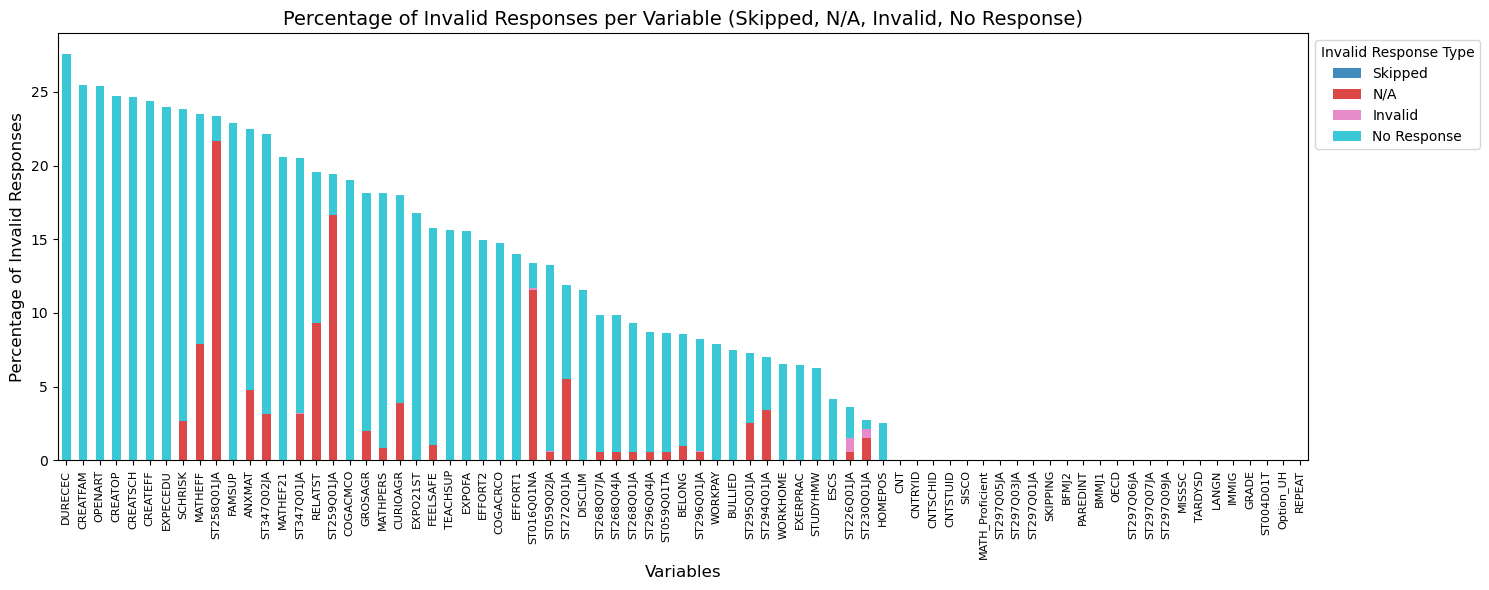

In [6]:
import matplotlib.pyplot as plt

# Define invalid values with their descriptions
invalid_values = {95: "Skipped", 97: "N/A", 98: "Invalid", 99: "No Response"}

# Calculate the percentage of each invalid value per column
invalid_counts = {desc: (df == val).mean() * 100 for val, desc in invalid_values.items()}

# Convert to DataFrame for plotting
invalid_df = pd.DataFrame(invalid_counts)

# Sort by total invalid percentage (descending)
invalid_df["Total Invalid %"] = invalid_df.sum(axis=1)
invalid_df = invalid_df.sort_values(by="Total Invalid %", ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(15, 6))
invalid_df.drop(columns=["Total Invalid %"]).plot(kind='bar', stacked=True, figsize=(15, 6), colormap="tab10", alpha=0.85)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Invalid Responses", fontsize=12)
plt.title("Percentage of Invalid Responses per Variable (Skipped, N/A, Invalid, No Response)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability
plt.legend(title="Invalid Response Type", bbox_to_anchor=(1, 1), loc="upper left")  # Move legend outside

plt.tight_layout()
plt.show()

# Data Check Before Cleaning

In [8]:
# Count unique values including NaNs
value_counts_table = df['OPENART'].value_counts(ascending=True, dropna=False).reset_index()

# Rename columns for clarity
value_counts_table.columns = ['Value', 'Count']

print("📊 Sorted Value Counts in 'WB031Q01NA':")
print(value_counts_table)

📊 Sorted Value Counts in 'WB031Q01NA':
        Value   Count
0      0.7934       1
1     -0.1840       1
2      0.0759       1
3      0.6269       1
4     -0.7839       1
...       ...     ...
5204  -0.4263   21282
5205  -0.2817   23033
5206   1.8261   28876
5207   0.6258   57963
5208  99.0000  156083

[5209 rows x 2 columns]


# Clean Invalid Values

This cleans the following invalid values from the dataset and turns them to nulls

## Exact matches of numbers on ANY column:

- 95 or 95.0000 or 995.00 or 9995.00 or 9999995.0000 (Valid Skip)
- 97 or 97.0000 or 997.00 or 9997.00 or 9999997.0000 (Not Applicable)
- 98 or 98.0000 or 998.00 or 9998.00 or 9999998.0000 (Invalid)
- 99 or 99.0000 or 999.00 or 9999.00 or 9999999.0000 (No Response)
- -999 (System Missing recoded to a negative number)

## Column specific matches

- SISCO, recode 5,7,8,9 to NaN
- ST004D01T, recode 5,7,8,9 to NaN
- REPEAT, recode 5,7,8,9 to NaN
- ST322Q01JA, recode 6 to NaN
- ST322Q02JA, recode 6 to NaN
- ST322Q03JA, recode 6 to NaN
- ST322Q04JA, recode 6 to NaN
- ST322Q06JA, recode 6 to NaN
- ST322Q07JA, recode 6 to NaN

In [9]:
# Define the cleaning function
def clean_dataset(df):
    """
    Cleans invalid values in the dataset by converting specified values to NaN.

    Parameters:
    df (pd.DataFrame): The input dataset to be cleaned.

    Returns:
    pd.DataFrame: The cleaned dataset.
    """
    # Define general invalid values to be replaced with NaN
    invalid_values = {
        95, 95.0000, 995.00, 9995.00, 9999995.0000,  # Valid Skip
        97, 97.0000, 997.00, 9997.00, 9999997.0000,  # Not Applicable
        98, 98.0000, 998.00, 9998.00, 9999998.0000,  # Invalid
        99, 99.0000, 999.00, 9999.00, 9999999.0000,  # No Response
        -999  # System Missing recoded to a negative number
    }

    # Convert all numeric columns to float (if they are not already)
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = df[col].astype(float)  # Ensures comparisons work properly

    # Apply general invalid value replacement across all columns
    df = df.replace(invalid_values, np.nan)

    # Define column-specific recoding
    column_specific_invalids = {
        "SISCO": [5, 7, 8, 9],
        "ST004D01T": [5, 7, 8, 9],
        "REPEAT": [5, 7, 8, 9],
        "ST322Q01JA": [6],
        "ST322Q02JA": [6],
        "ST322Q03JA": [6],
        "ST322Q04JA": [6],
        "ST322Q06JA": [6],
        "ST322Q07JA": [6]
    }

    # Apply column-specific replacements using dictionary mapping
    for col, values in column_specific_invalids.items():
        if col in df.columns:  # Only process if the column exists
            df[col] = df[col].replace({v: np.nan for v in values})

    return df

# Apply the cleaning function to the dataset
df = clean_dataset(df)

# Data Check After Cleaning

In [11]:
# Count unique values including NaNs
value_counts_table = df['OPENART'].value_counts(ascending=True, dropna=False).reset_index()

# Rename columns for clarity
value_counts_table.columns = ['Value', 'Count']

print("📊 Sorted Value Counts in 'OPENART':")
print(value_counts_table)

📊 Sorted Value Counts in 'OPENART':
       Value   Count
0     0.7934       1
1    -0.1840       1
2     0.0759       1
3     0.6269       1
4    -0.7839       1
...      ...     ...
5204 -0.4263   21282
5205 -0.2817   23033
5206  1.8261   28876
5207  0.6258   57963
5208     NaN  156083

[5209 rows x 2 columns]


In [12]:
df.dtypes

MATH_Proficient    float64
CNT                 object
CNTRYID            float64
CNTSCHID           float64
CNTSTUID           float64
                    ...   
CREATOP            float64
OPENART            float64
ESCS               float64
WORKPAY            float64
WORKHOME           float64
Length: 75, dtype: object

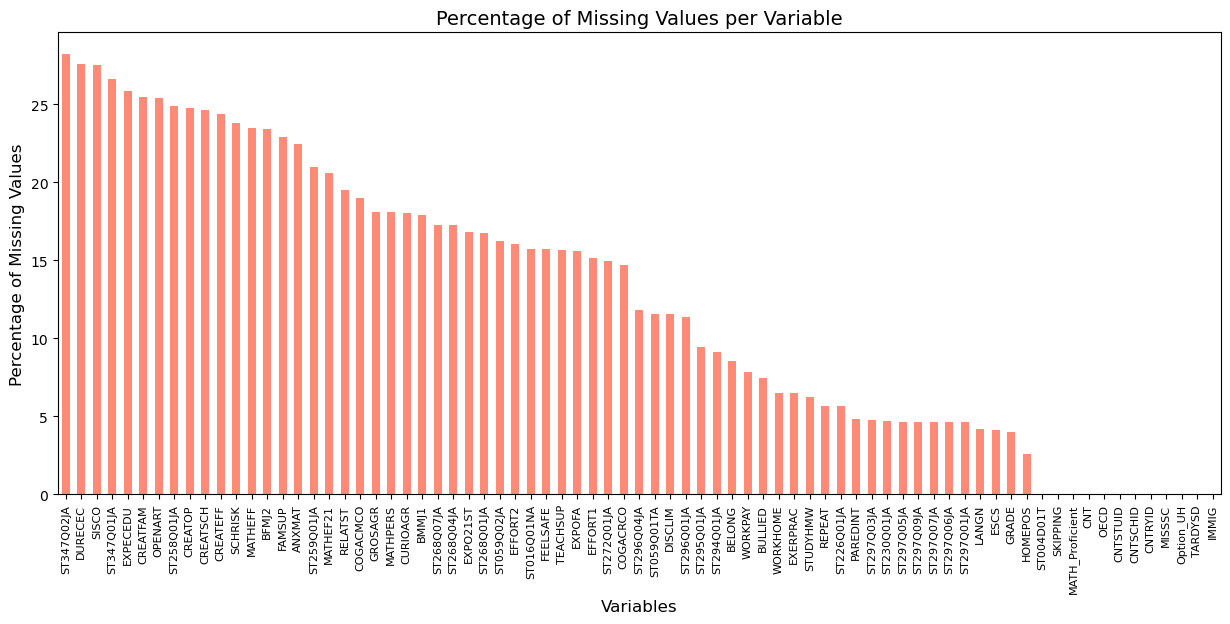

In [13]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values
null_percentages = df.isnull().mean() * 100

# Sort by highest missing values
null_percentages = null_percentages.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
null_percentages.plot(kind='bar', color='tomato', alpha=0.75)

# Formatting
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.title("Percentage of Missing Values per Variable", fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for readability

plt.show()

In [35]:
# Exclude 'CNT' column from the missing values calculation
missing_by_country = df.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)

# No need to droplevel since CNT is no longer included in the index
missing_by_country = missing_by_country.T  # Transpose for readability

# Save to CSV
csv_filename = "v2.1.1-refined-mick-missing_values_by_country_v2.csv"
missing_by_country.to_csv(csv_filename, index=True)

print(f"✅ Missing values breakdown saved to {csv_filename}")


✅ Missing values breakdown saved to v2.1.1-refined-mick-missing_values_by_country_v2.csv


/tmp/ipykernel_1919/1377478543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = df.groupby("CNT").apply(lambda x: x.drop(columns=["CNT"]).isnull().mean() * 100)


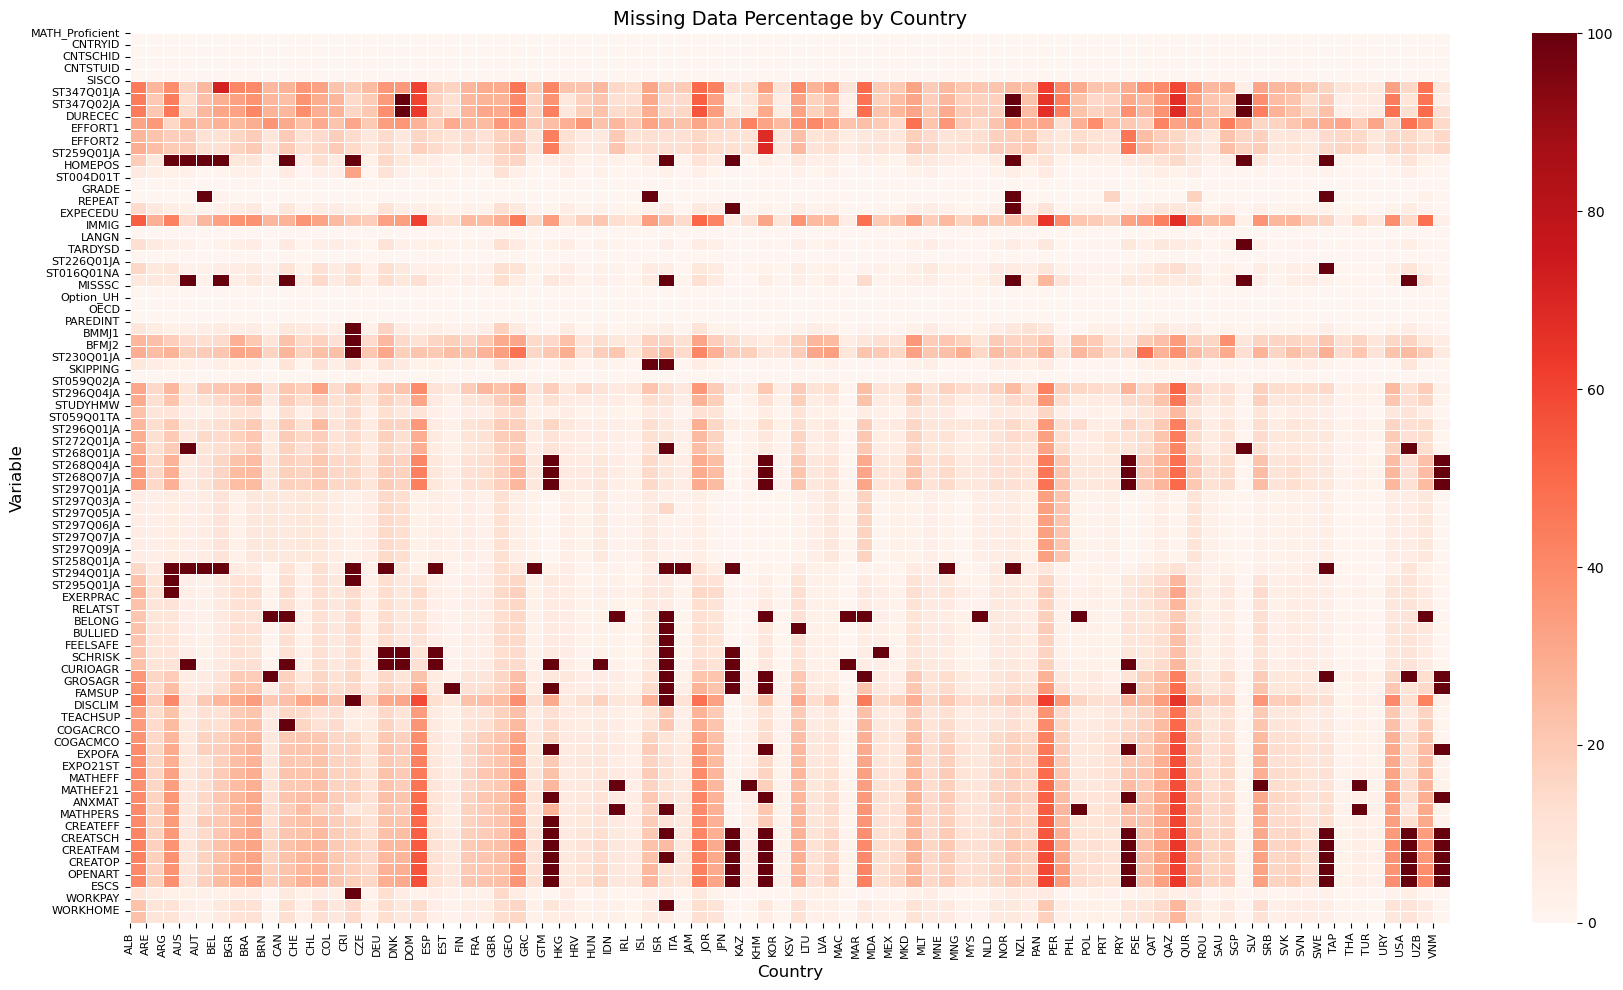

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(18, 10))  # Increase figure size for better readability

ax = sns.heatmap(
    missing_by_country, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.5, 
    cbar=True, 
    vmin=0, vmax=100
)

# Ensure all variables (y-axis) are displayed
ax.set_yticks(range(len(missing_by_country.index)))  # Set tick positions
ax.set_yticklabels(missing_by_country.index, fontsize=8)  # Adjust font size

# Ensure all countries (x-axis) are displayed
ax.set_xticks(range(len(missing_by_country.columns)))  # Set tick positions
ax.set_xticklabels(missing_by_country.columns, fontsize=8, rotation=90)  # Rotate labels for readability

# Formatting
plt.title("Missing Data Percentage by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Variable", fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()


In [17]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var} {description}")

🚨 Variables recommended for exclusion due to high missing rates:


In [18]:
# Find variables where more than 30% of values are missing globally
missing_threshold = 30  # Percentage threshold
variables_to_exclude = missing_by_country[missing_by_country.mean(axis=1) > missing_threshold].index.tolist()

# Print the variables with descriptions
print("🚨 Variables recommended for exclusion due to high missing rates:")
for var in variables_to_exclude:
    description = field_description_lookup.get(var, "No description available")  # Lookup description or fallback
    print(f"- {var}")


🚨 Variables recommended for exclusion due to high missing rates:


In [19]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)

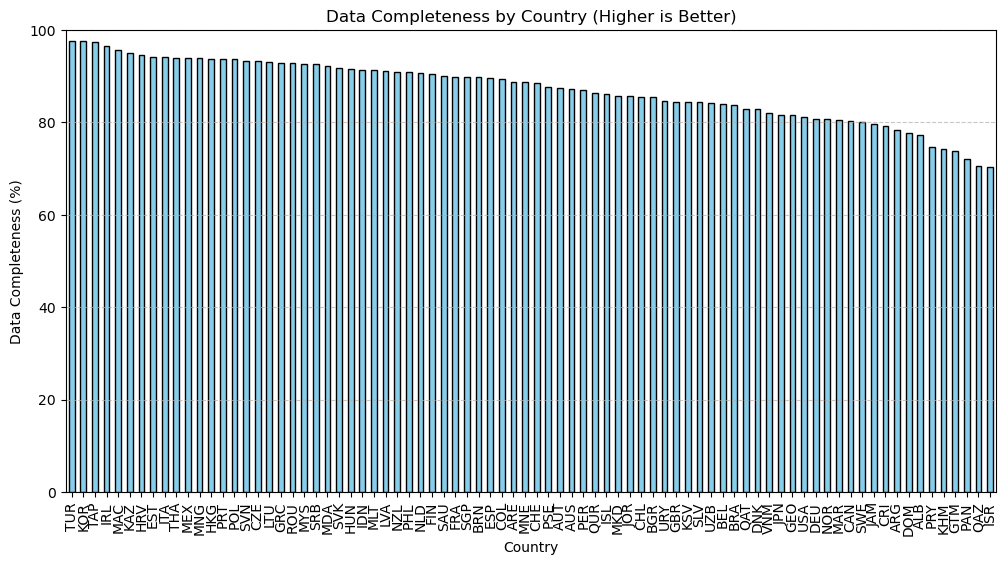

In [20]:
import matplotlib.pyplot as plt

# Plot the data completeness per country
plt.figure(figsize=(12, 6))
data_completeness_sorted.plot(kind="bar", color="skyblue", edgecolor="black")

# Formatting
plt.xlabel("Country")
plt.ylabel("Data Completeness (%)")
plt.title("Data Completeness by Country (Higher is Better)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0, 100)  # Ensure scale is from 0% to 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [21]:
# Calculate the percentage of missing values per country
missing_percentage_by_country = missing_by_country.mean(axis=0)  # Mean missing % per country

# Filter countries where the missing percentage is <= 30%
countries_with_most_complete_data = missing_percentage_by_country[missing_percentage_by_country <= 35].index.tolist()

# Print the countries with the most complete data
print("🌍 Countries with the most complete data (≤ 30% missing across all variables):")
for country in countries_with_most_complete_data:
    print(f"- {country}")

🌍 Countries with the most complete data (≤ 30% missing across all variables):
- ALB
- ARE
- ARG
- AUS
- AUT
- BEL
- BGR
- BRA
- BRN
- CAN
- CHE
- CHL
- COL
- CRI
- CZE
- DEU
- DNK
- DOM
- ESP
- EST
- FIN
- FRA
- GBR
- GEO
- GRC
- GTM
- HKG
- HRV
- HUN
- IDN
- IRL
- ISL
- ISR
- ITA
- JAM
- JOR
- JPN
- KAZ
- KHM
- KOR
- KSV
- LTU
- LVA
- MAC
- MAR
- MDA
- MEX
- MKD
- MLT
- MNE
- MNG
- MYS
- NLD
- NOR
- NZL
- PAN
- PER
- PHL
- POL
- PRT
- PRY
- PSE
- QAT
- QAZ
- QUR
- ROU
- SAU
- SGP
- SLV
- SRB
- SVK
- SVN
- SWE
- TAP
- THA
- TUR
- URY
- USA
- UZB
- VNM


In [22]:
# Calculate the percentage of missing data per country
missing_percentage = missing_by_country.mean(axis=0)  # Mean missing percentage per country
data_completeness = 100 - missing_percentage  # Convert to completeness

# Sort countries by completeness
data_completeness_sorted = data_completeness.sort_values(ascending=False)
data_completeness_sorted

CNT
TUR    97.630196
KOR    97.538924
TAP    97.427887
IRL    96.564961
MAC    95.720310
         ...    
KHM    74.259048
GTM    73.787950
PAN    72.055220
QAZ    70.641192
ISR    70.399331
Length: 80, dtype: float64

In [23]:
# Function to get memory usage of all DataFrames in the current notebook session
def get_dataframe_memory_usage():
    df_memory_usage = {}
    
    for var_name in globals():
        var_value = globals()[var_name]
        
        if isinstance(var_value, pd.DataFrame):
            memory_usage = var_value.memory_usage(deep=True).sum() / (1024 ** 2)  # Convert bytes to MB
            df_memory_usage[var_name] = memory_usage
    
    # Convert to DataFrame for better readability
    df_memory_usage_df = pd.DataFrame(list(df_memory_usage.items()), columns=["DataFrame", "Memory (MB)"])
    df_memory_usage_df = df_memory_usage_df.sort_values(by="Memory (MB)", ascending=False)
    
    return df_memory_usage_df

# Get the memory usage of all DataFrames
df_memory_usage_report = get_dataframe_memory_usage()

df_memory_usage_report

,DataFrame,Memory (MB)
1,df,381.623478
3,df_metadata,0.249718
5,value_counts_table,0.079609
6,missing_by_country,0.051762
4,invalid_df,0.009514
2,_1,0.003235
0,___,0.003235


In [24]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns



Missing Values:
MATH_Proficient         0
CNT                     0
CNTRYID                 0
CNTSCHID                0
CNTSTUID                0
                    ...  
CREATOP            151912
OPENART            156083
ESCS                25468
WORKPAY             48242
WORKHOME            39935
Length: 75, dtype: int64


# Solving for Simpsons Paradox!

In [25]:
# List to store per-country correlation matrices
country_correlation_matrices = []

# Compute correlation matrices for each country
for country, group in df.groupby("CNT"):
    country_corr_matrix = group[numeric_cols].corr()  # Full correlation matrix
    country_correlation_matrices.append(country_corr_matrix)

# Convert list to 3D numpy array (stacking matrices)
correlation_tensor = np.stack([df.values for df in country_correlation_matrices], axis=2)

# Compute the mean correlation across countries (element-wise)
average_correlation_matrix = np.nanmean(correlation_tensor, axis=2)  # Averaging along country axis

# Convert back to a DataFrame
average_correlation_df = pd.DataFrame(average_correlation_matrix, index=numeric_cols, columns=numeric_cols)


/tmp/ipykernel_1919/4098656742.py:13: RuntimeWarning: Mean of empty slice
  average_correlation_matrix = np.nanmean(correlation_tensor, axis=2)  # Averaging along country axis


In [26]:
average_correlation_df.shape

(74, 74)

# Original Correlation (Not Averaging By Country)

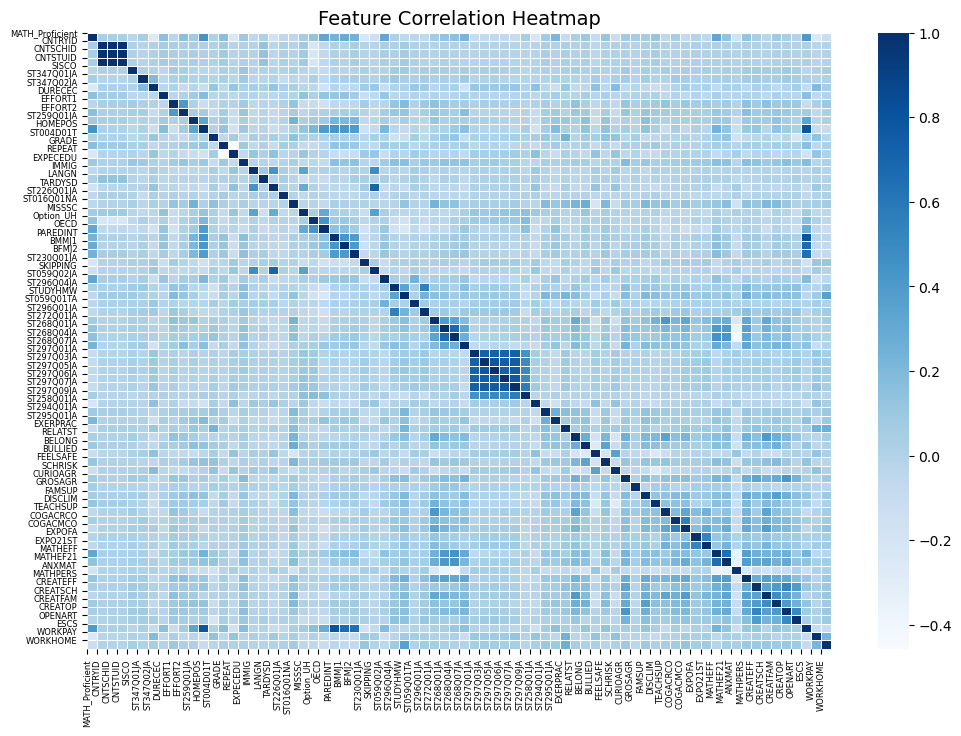

In [27]:
# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df[numeric_cols].corr(),
    cmap='Blues',
    annot=False,
    linewidths=0.5
)

# Adjust font sizes and rotation for readability
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=8, rotation=0)   # Rotate y-axis labels

# Force every label to be shown
plt.gca().set_xticks(range(len(numeric_cols)))  # Set x-ticks
plt.gca().set_xticklabels(numeric_cols, fontsize=6, rotation=90)  # Force labels
plt.gca().set_yticks(range(len(numeric_cols)))  # Set y-ticks
plt.gca().set_yticklabels(numeric_cols, fontsize=6, rotation=0)  # Force labels

plt.show()

# Now Averaging By Country

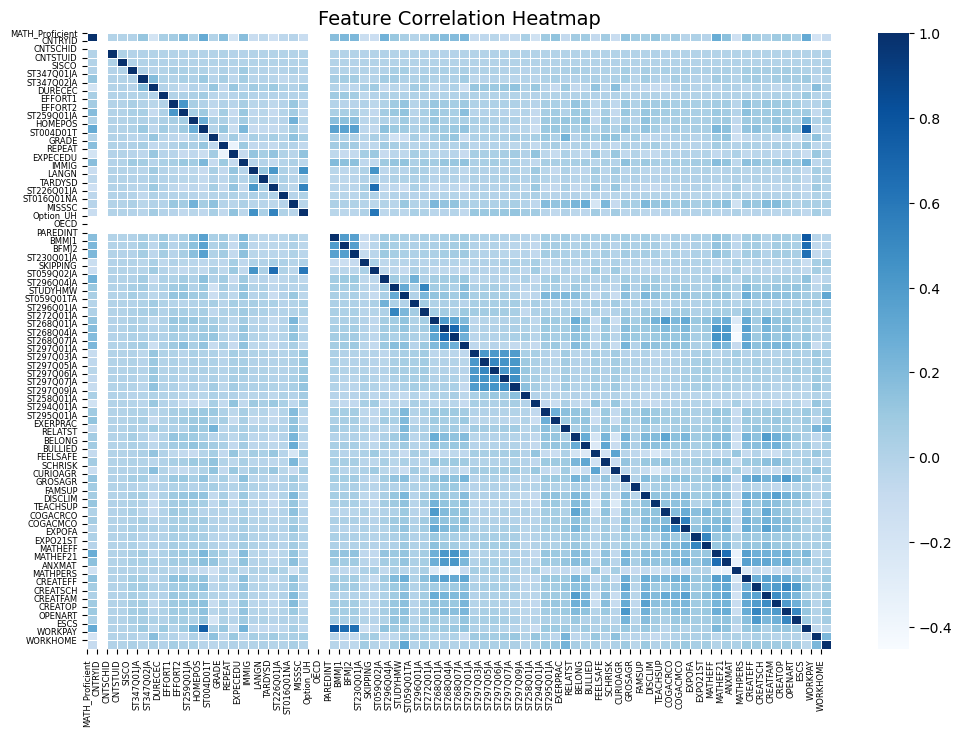

In [28]:
# Plot correlation heatmap only for numeric variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    average_correlation_df,
    cmap='Blues',
    annot=False,
    linewidths=0.5
)

# Adjust font sizes and rotation for readability
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=8, rotation=0)   # Rotate y-axis labels

# Force every label to be shown
plt.gca().set_xticks(range(len(numeric_cols)))  # Set x-ticks
plt.gca().set_xticklabels(numeric_cols, fontsize=6, rotation=90)  # Force labels
plt.gca().set_yticks(range(len(numeric_cols)))  # Set y-ticks
plt.gca().set_yticklabels(numeric_cols, fontsize=6, rotation=0)  # Force labels

plt.show()


# Without Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
In last 3 years, did school close because: For another reason (e.g. a natural disaster, strikes or demonstrations, air pollution)   -0.260624
Working for pay before or after school                                                                                              -0.238678
Grade repetition                                                                                                                    -0.227815
In the past 30 days, how often did you not eat because there was not enough money to buy food?                                      -0.216164
How many siblings (including brothers, sisters, step-brothers, and step-sisters) do you have?                                       -0.213669
Arriving late for school stricter definition                                                                                        -0.174493
Mathematics Anxiety (WLE)                                                                          

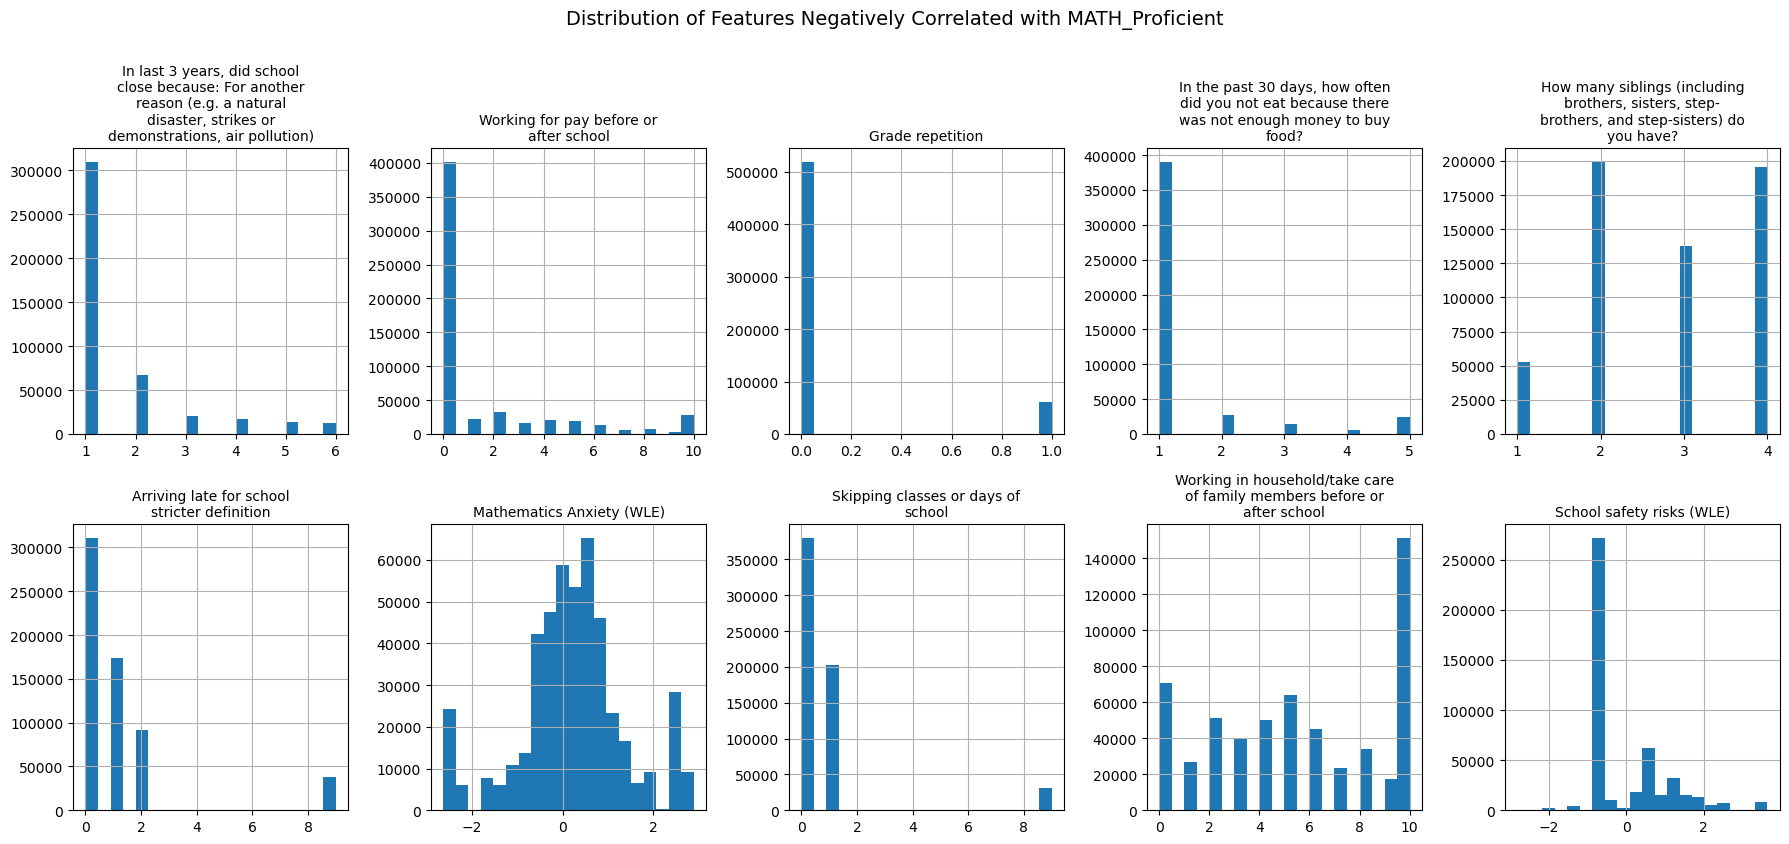

In [29]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()



# WITH Averaging - Top Negative Correlations


Top Negative Correlations with MATH_Proficient:
Working for pay before or after school                                                                                              -0.192860
Grade repetition                                                                                                                    -0.187569
In last 3 years, did school close because: For another reason (e.g. a natural disaster, strikes or demonstrations, air pollution)   -0.187478
In the past 30 days, how often did you not eat because there was not enough money to buy food?                                      -0.167204
Mathematics Anxiety (WLE)                                                                                                           -0.153937
Arriving late for school stricter definition                                                                                        -0.145884
Skipping classes or days of school                                                                 

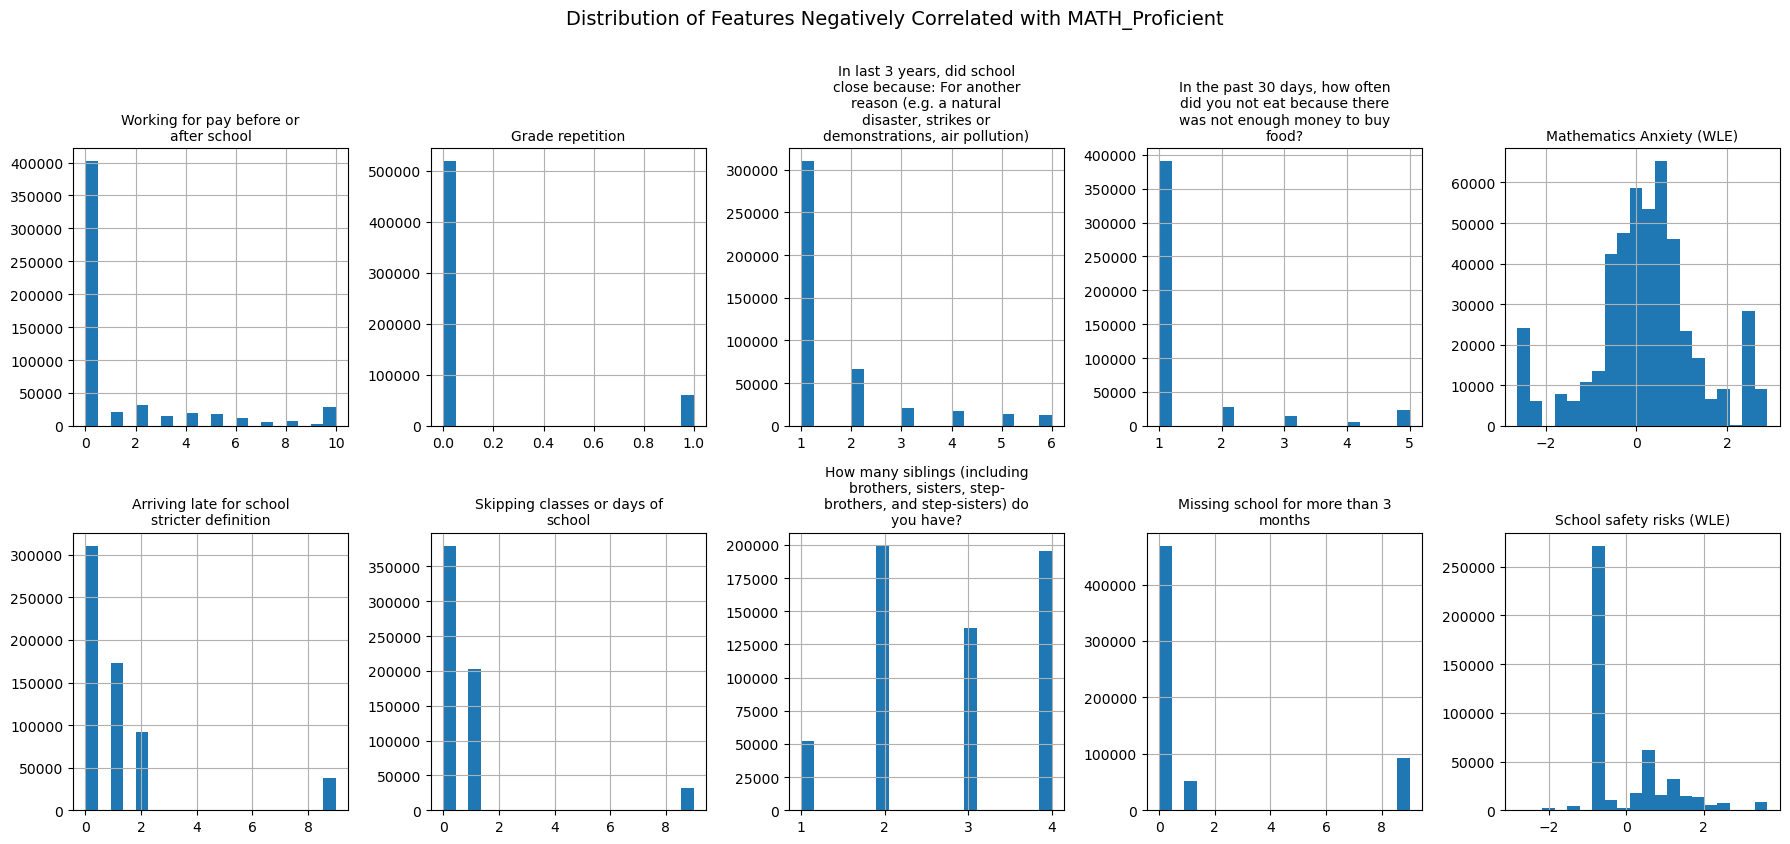

In [30]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Negative Correlations with MATH_Proficient:")
print(correlations_named.head(10))

# Get top 10 negatively correlated features
top_negative = correlations.head(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_negative}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_negative):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Negatively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()


# Without Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
Agree/disagree: I want to do well in my mathematics class.                                             0.229916
Index highest parental education (international years of schooling scale)                              0.232466
Father’s occupational status (ISEI) based on 4-digit human coded ISCO                                  0.246174
Mother’s occupational status (ISEI) based on 4-digit human coded ISCO                                  0.288313
OECD country                                                                                           0.311916
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.313869
Total number of [class periods] per week for all subjects, including mathematics                       0.314148
Index of economic, social and cultural status                                                          0.407717
Home possessions (WLE)                                 

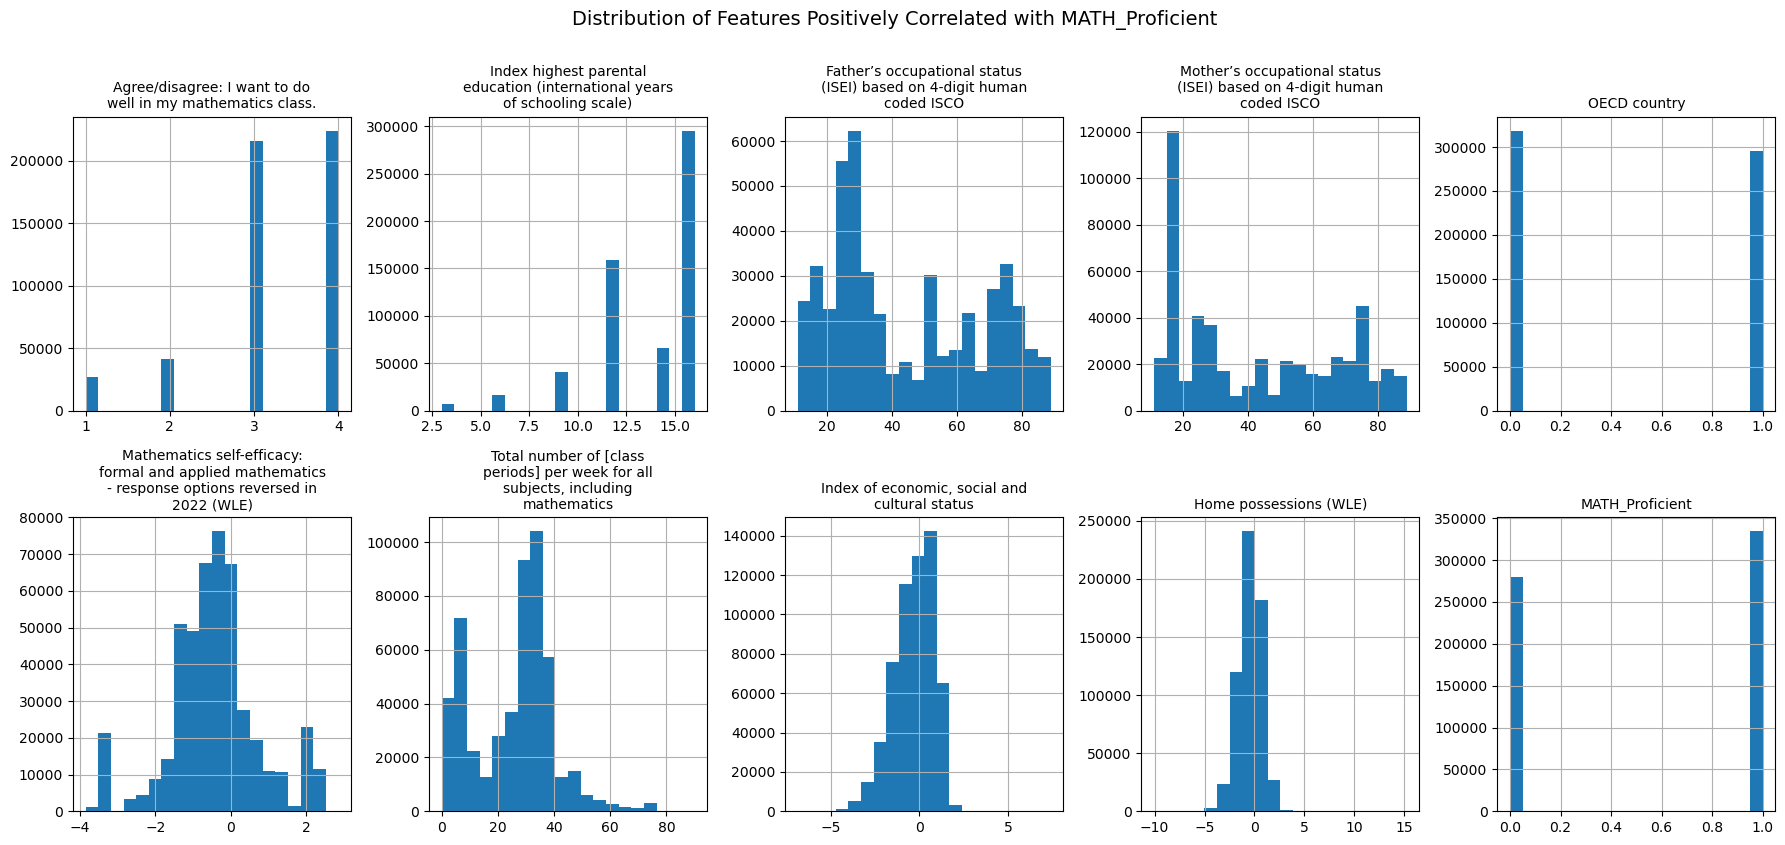

In [31]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = df[numeric_cols].corr()["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

# WITH Averaging - Top Positive Correlations


Top Positive Correlations with MATH_Proficient:
Mother’s occupational status (ISEI) based on 4-digit human coded ISCO                                  0.210394
Agree/disagree: I want to do well in my mathematics class.                                             0.217483
Total number of [class periods] per week for all subjects, including mathematics                       0.247637
Mathematics self-efficacy: formal and applied mathematics - response options reversed in 2022 (WLE)    0.285172
Home possessions (WLE)                                                                                 0.292171
Index of economic, social and cultural status                                                          0.297262
MATH_Proficient                                                                                        1.000000
Country Identifier                                                                                          NaN
Une Heure Option                                       

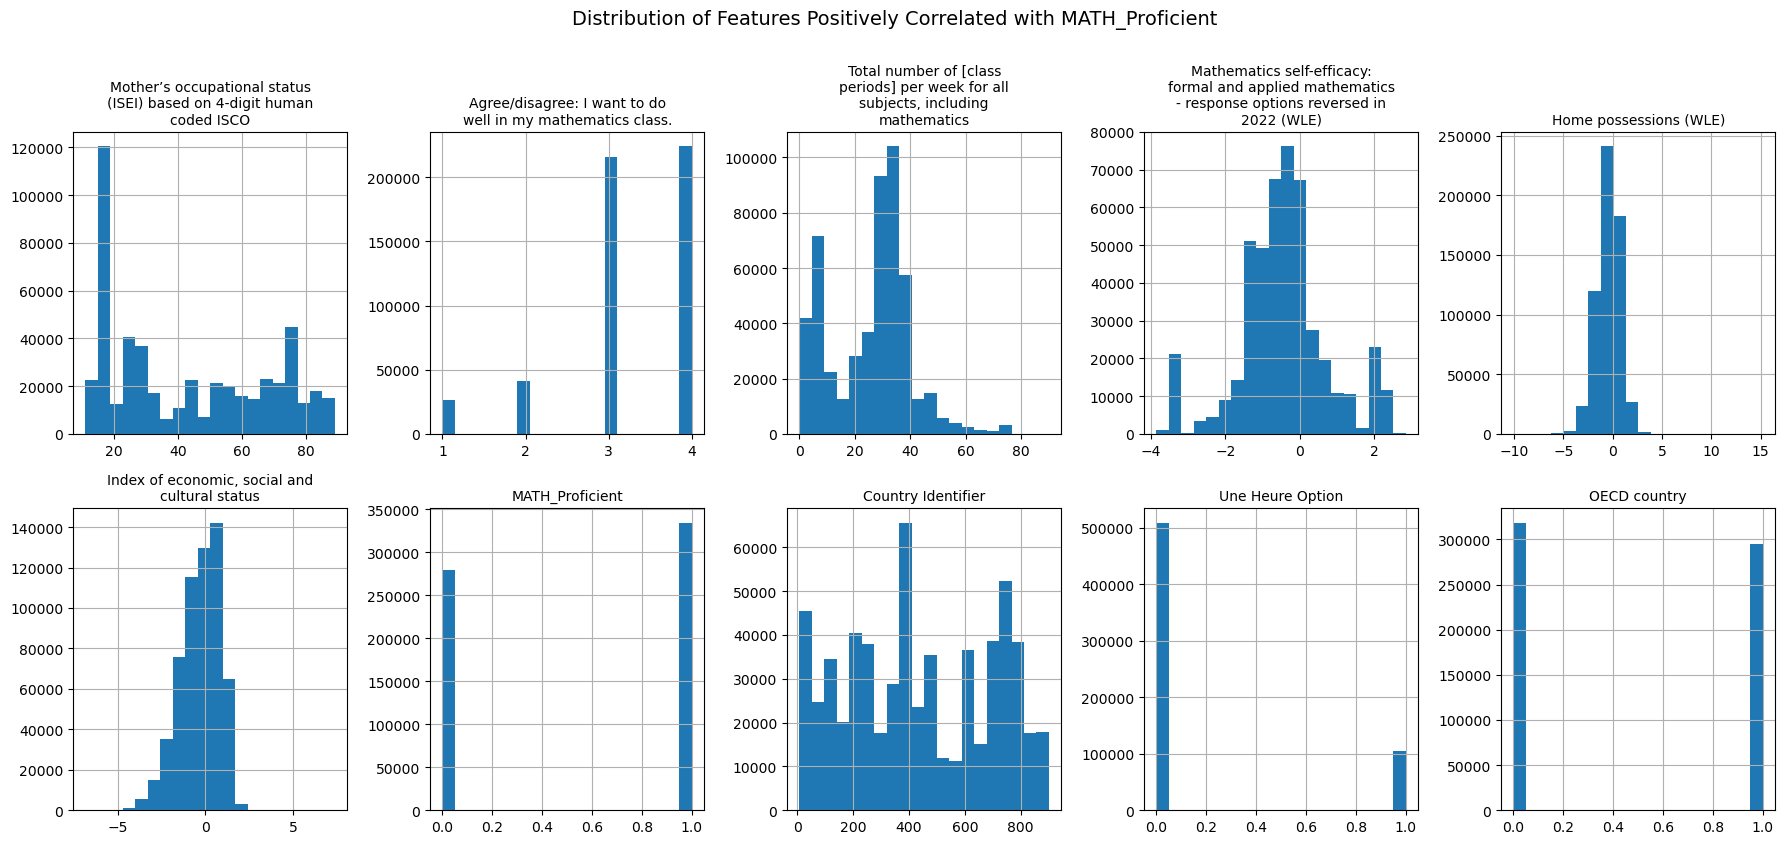

In [32]:
import textwrap

# Analyze correlation with MATH_Proficient
correlations = average_correlation_df["MATH_Proficient"].sort_values()

# Replace field codes with descriptions for display
correlations_named = correlations.rename(index=lambda x: field_description_lookup.get(x, x))

# Print Top Negative Correlations with Descriptions
print("\nTop Positive Correlations with MATH_Proficient:")
print(correlations_named.tail(10))

# Get top 10 positively correlated features
top_positive = correlations.tail(10).index  # Keep original field IDs for selecting data

# Create a mapping for renaming columns in the plot
renamed_columns = {col: field_description_lookup.get(col, col) for col in top_positive}

# Create histograms with wrapped text
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))  # Adjust grid size for spacing
axes = axes.flatten()  # Flatten 2D array of axes to iterate easily

for i, col in enumerate(top_positive):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20)

    # Wrap the title text
    wrapped_title = "\n".join(textwrap.wrap(renamed_columns.get(col, col), width=30))
    ax.set_title(wrapped_title, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Distribution of Features Positively Correlated with MATH_Proficient", fontsize=14, y=1.05)
plt.show()

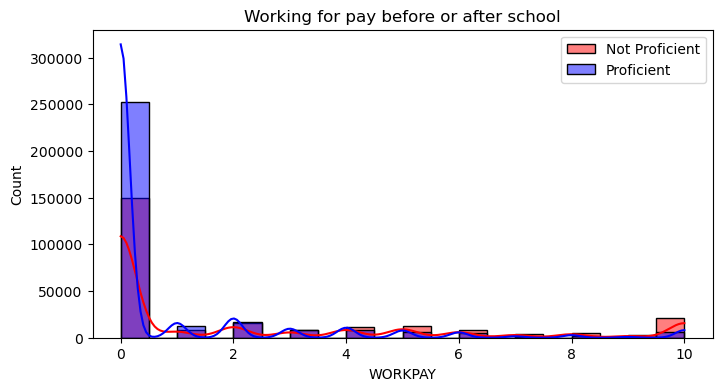

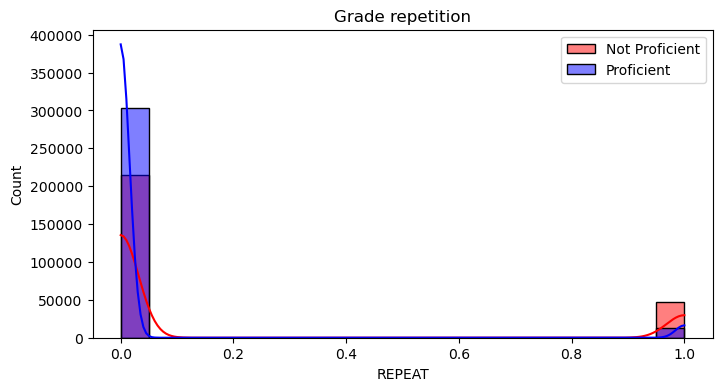

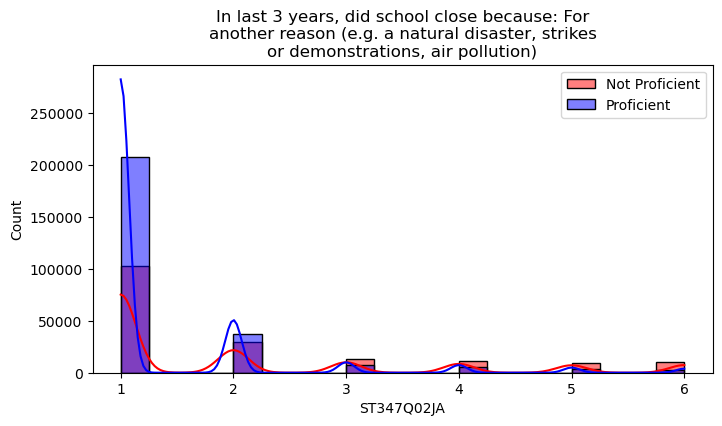

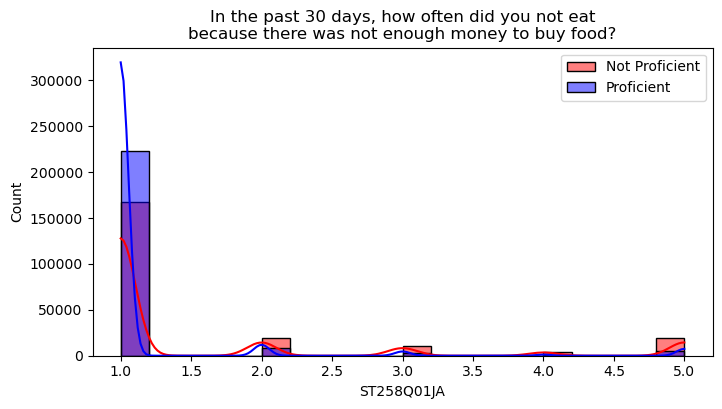

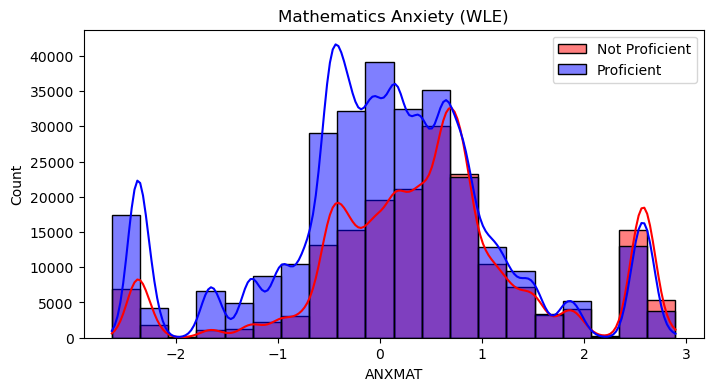

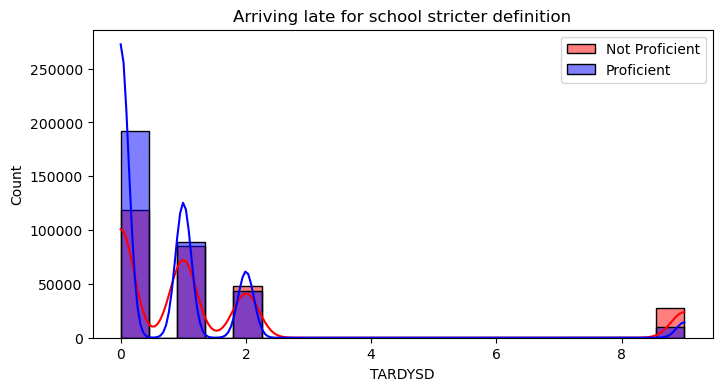

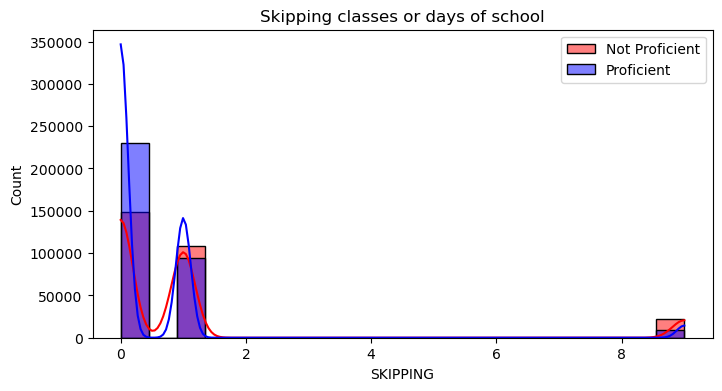

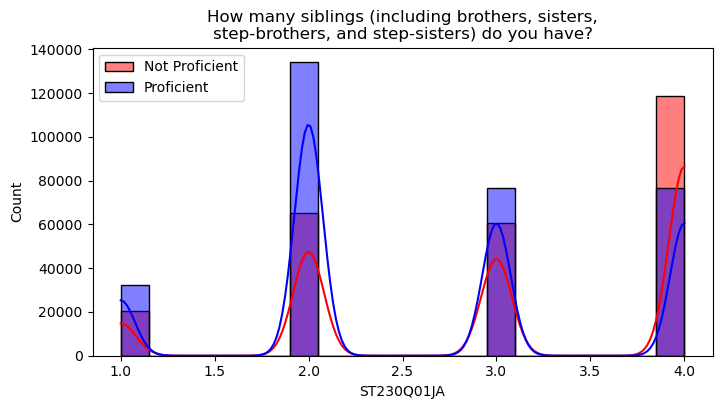

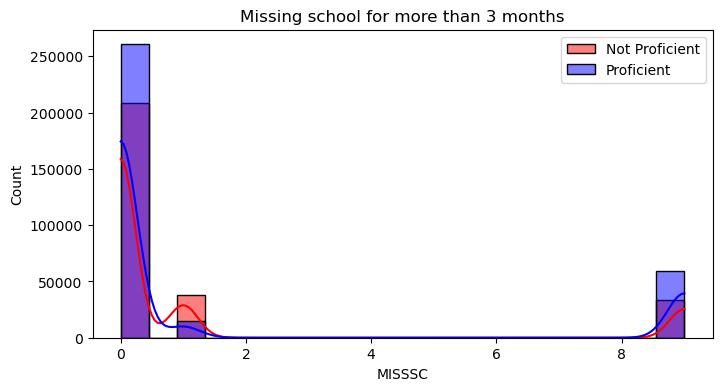

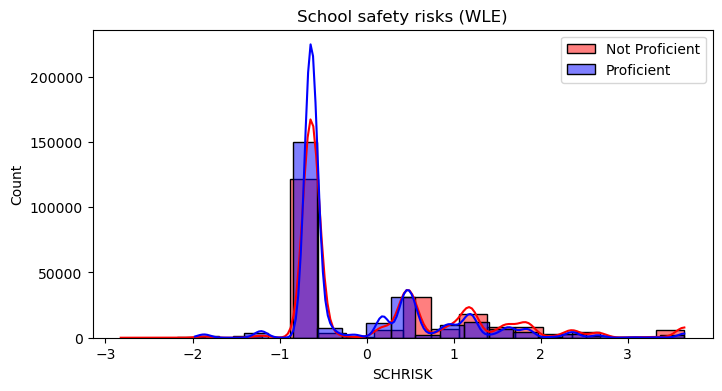

In [33]:
for col in top_negative:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df[df["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()

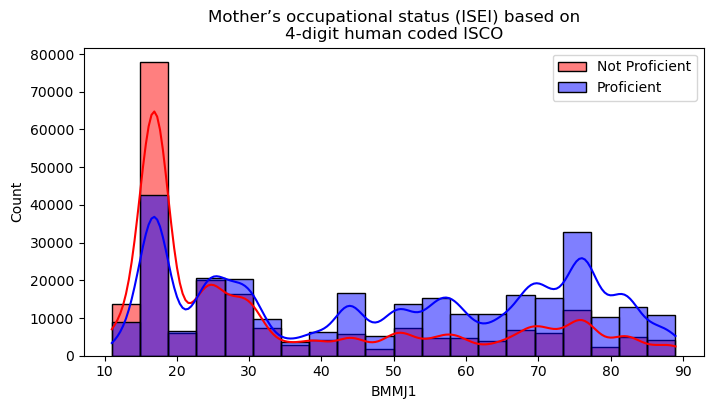

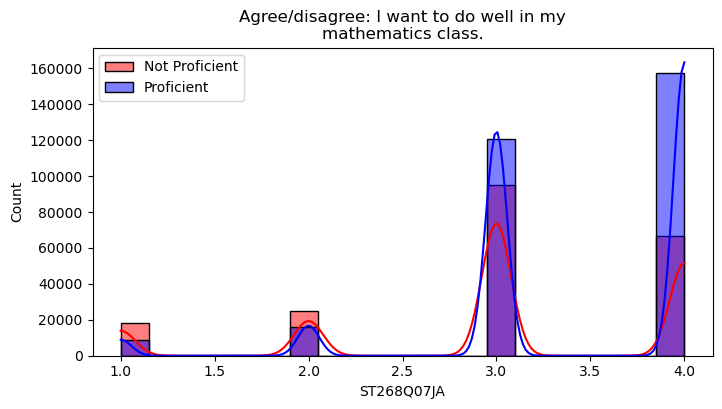

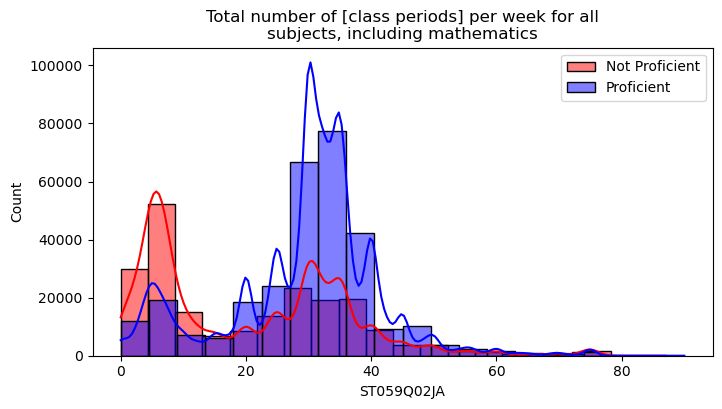

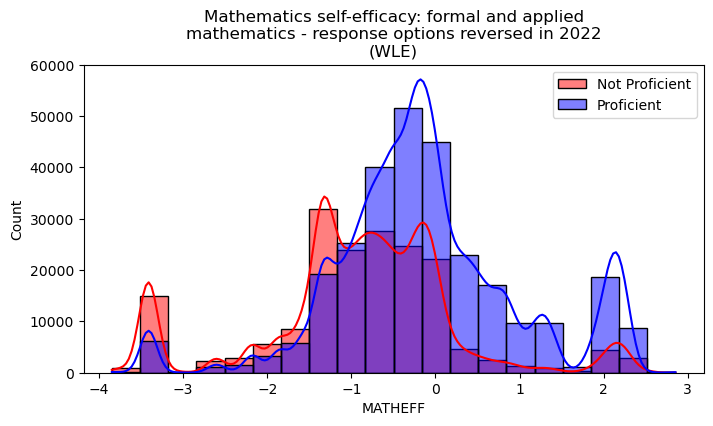

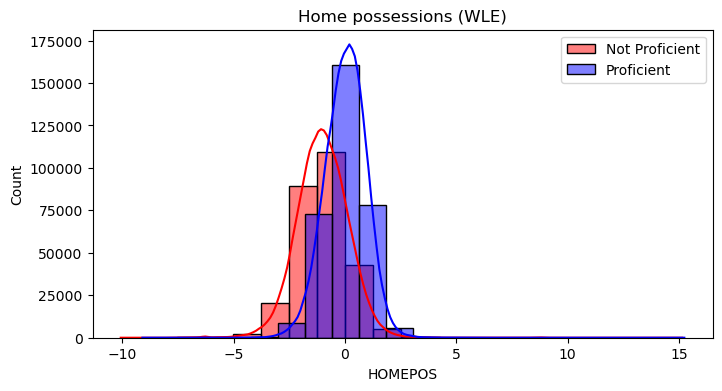

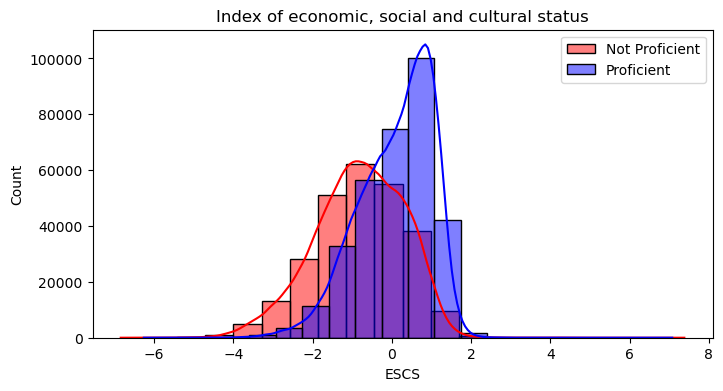

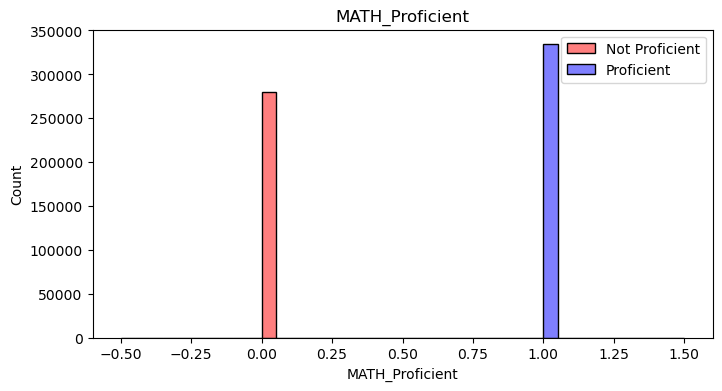

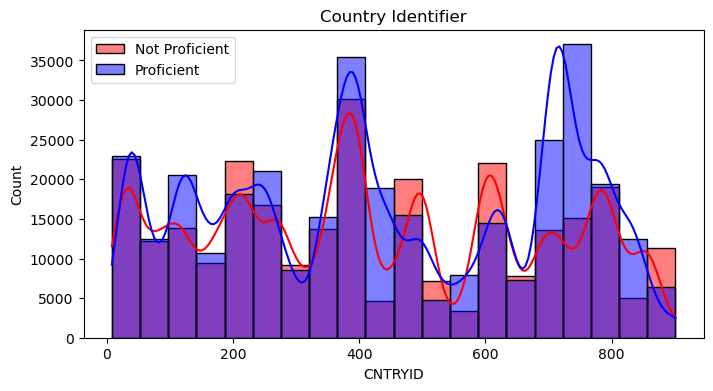

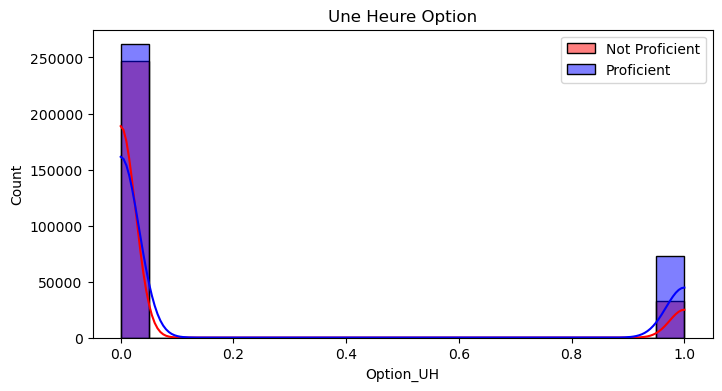

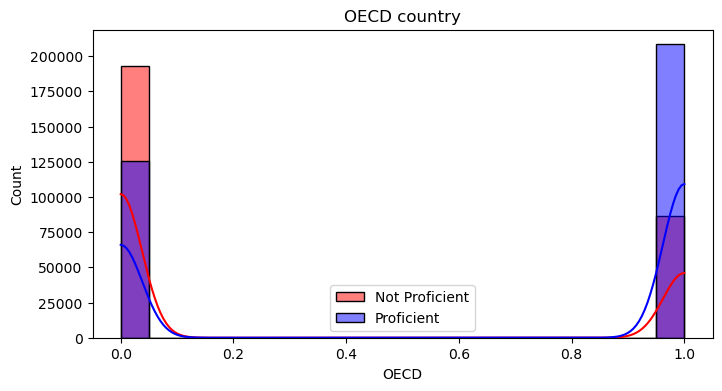

In [34]:
for col in top_positive:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df["MATH_Proficient"] == 0][col], color="red", label="Not Proficient", kde=True, bins=20)
    sns.histplot(df[df["MATH_Proficient"] == 1][col], color="blue", label="Proficient", kde=True, bins=20)

    wrapped_title = "\n".join(textwrap.wrap(field_description_lookup.get(col, col), width=50))
    plt.title(wrapped_title)
    plt.legend()
    plt.show()